# Standard Sparse AutoEncoder

In [5]:
from nlp_features.sae.gated_sae import GatedTrainer, GatedAutoEncoder
activation_dim, dict_size = 512, 1000
device='cuda:0'
steps = 1000
trainer = GatedTrainer(
    activation_dim=512,
    dict_size=64*512,
    lr=1e-3, 
    warmup_steps=100, # lr warmup period at start of training and after each resample
    device=device,
    resample_steps=10, # how often to resample neurons
    steps=steps,
    initial_sparsity_penalty=5e-1
)

In [6]:
import os 
import torch 
# check save 
path = 'outputs'
os.makedirs(path, exist_ok=True)

ae = trainer.ae 
print(ae)
torch.save(ae.state_dict(), "outputs/params.pth")

# check load 
path =  "outputs/params.pth"
loaded_ae = GatedAutoEncoder.from_pretrained(path)
for p in loaded_ae.named_parameters():
    print(p[0], p[1].shape)


GatedAutoEncoder(
  (encoder): Linear(in_features=512, out_features=32768, bias=False)
  (decoder): Linear(in_features=32768, out_features=512, bias=False)
)
decoder_bias torch.Size([512])
r_mag torch.Size([32768])
gate_bias torch.Size([32768])
mag_bias torch.Size([32768])
encoder.weight torch.Size([32768, 512])
decoder.weight torch.Size([512, 32768])


In [7]:
# encode and decode 
import torch 
c
reconstructed_activations.shape, features.shape

(torch.Size([4, 512]), torch.Size([4, 32768]))

100%|██████████| 1000/1000 [00:58<00:00, 17.20it/s] 


no dead neurons
no dead neurons
no dead neurons


no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons


no dead neurons
no dead neurons
no dead neurons


no dead neurons


no dead neurons
no dead neurons
no dead neurons


no dead neurons


no dead neurons
no dead neurons
no dead neurons


no dead neurons


no dead neurons
no dead neurons
no dead neurons


no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


 22%|██▏       | 221/1000 [00:02<00:07, 99.04it/s]

no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons
no dead neurons


no dead neurons
no dead neurons
no dead neurons
no dead neurons


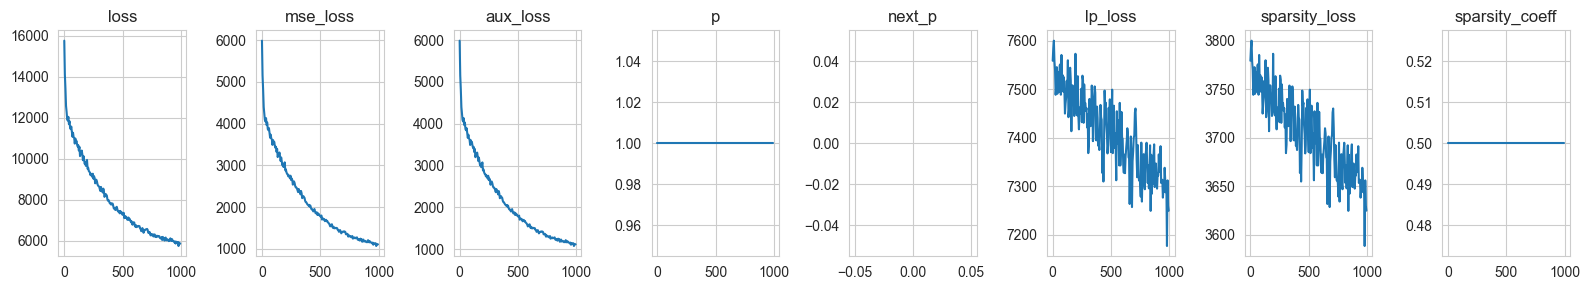

In [8]:
# train 

import torch 
import seaborn as sns 
from tqdm import tqdm 
import matplotlib.pyplot as plt 

infos = {}
log_step = 5
total_steps = 1000

pbar = tqdm(total=total_steps)
for step in range(total_steps):
    pbar.update(1)
    act = torch.randn(32, 512).to(device)
    trainer.update(step, act)
    if step % log_step == 0:
        with torch.no_grad():
            infos[step] = trainer.loss(act, step, logging=True)[3]
            
sns.set_style("whitegrid")
def visualize_infos(infos, figsize=(12,2.5)):
    steps = sorted(list(infos.keys()))
    names = list(infos[steps[0]].keys())
    fig, axes = plt.subplots(1, len(names), figsize=figsize)
    for i in range(len(names)):
        name = names[i]
        sns.lineplot(x=steps, y=[infos[step][name] for step in steps], ax=axes[i])
        axes[i].set_title(name)
    plt.tight_layout()
    return fig, axes 

visualize_infos(infos, figsize=(16,3))

os.makedirs("assets", exist_ok=True)
plt.savefig("assets/loss.png")